In [79]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

In [80]:
F = 3
t = np.linspace(-np.pi,np.pi,360*F)

In [81]:
C = np.sin(F*t)

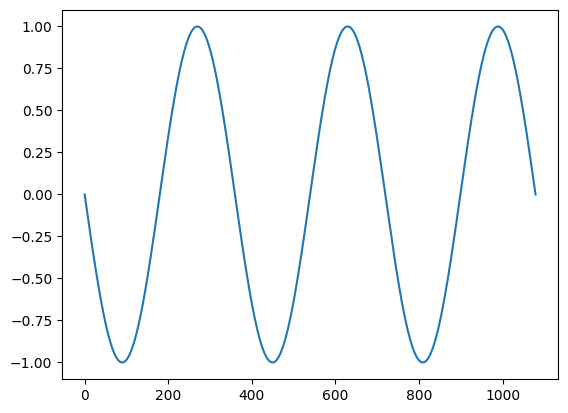

In [82]:
plt.plot(C)
plt.show()

In [83]:
def byte2bits(byte,MSB_first=True):
    bits = []
    for i in range(8):
        mask = 1<<i
        if byte&mask:
            bits.append(1)
        else:
            bits.append(0)
    if MSB_first:
        bits.reverse()
    return bits

In [84]:
byte2bits(10)

[0, 0, 0, 0, 1, 0, 1, 0]

In [85]:
def gen_carrier(freq:float,length)->np.ndarray:
    w = np.linspace(-np.pi,np.pi,length)
    C = np.cos(freq*w)
    S = np.sin(freq*w)
    return C+1j*S

def byte2bits(byte,MSB_first=True):
    bits = []
    for i in range(8):
        mask = 1<<i
        if byte&mask:
            bits.append(1)
        else:
            bits.append(0)
    if MSB_first:
        bits.reverse()
    return bits


def fsk_modulate(data:bytearray,f1=1000,f2=2000):
    result = []
    carrier_f1 = gen_carrier(f1,f2*2)
    carrier_f2 = gen_carrier(f2,f2*2)
    for d in data:
        bits = byte2bits(d)
        for b in bits:
            if b:
                result.append(carrier_f1)
            else:
                result.append(carrier_f2)
    return np.concatenate(result)


In [86]:
message = [0x55,0x55,0x55,0x55,0x55]
mod_msg = fsk_modulate(message,f1=1000,f2=2000)


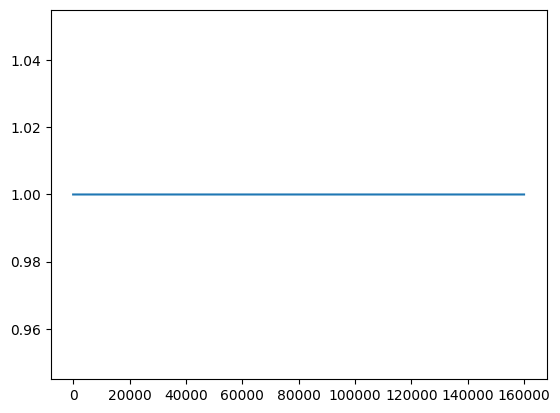

In [87]:
plt.plot(abs(mod_msg))
plt.show()

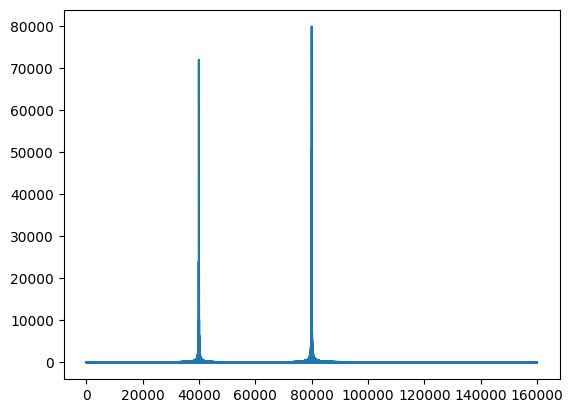

In [88]:
spectrum = np.fft.fft(mod_msg)
plt.plot(abs(spectrum))
plt.show()